<a href="https://colab.research.google.com/github/BrunoLoducca/Machine-Learning---Dados-com-Altas-Dimens-es/blob/main/Machine_Learning_Clustering_B%C3%A1sico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly==4.1.
!pip install biokit

     |████████████████████████████████| 7.1 MB 19.2 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=24c4ed0d75396b5fc5f44bb8428bf68460a1cbbc4002d08644f8811de09c8478
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 4.1.0 which is incompatible.
     |████████████████████████████████| 162 kB 15.1 MB/s 
     |████████████████████████████████| 47 kB 3.2 MB/s 
     |████████████████████████████████| 1.0 MB 33.1 MB/s 
     |████████████████████████████████| 2.3 MB 37.6 MB/s 
     |

In [ ]:
# Atualmente conheco duas formas de aprendizado de máquina:
# O não e o supervisionado. 
# O primeiro opera segundo agrupamentos dos dados, 
# que sem uma supervisao, isto é, falando
# quais sao os valores verdadeiros ou falso aprende. 
# Por outro lado, o segundo não, aprendendo apenas por 
# meio da supervisao. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados_df = pd.read_csv("Wine.csv")

a_renomear = {"Alcohol": "Alcool", 
              "Ash":"Po", 
              "Ash_Alcanity": "Po_Alcalinizado", 
              "Magnesium": "Magnesio", 
              "Total_Phenols": "Totais_de_Fenois", 
              "Flavanoids": "Flavonoides", 
              "Nonflavanoid_Phenols": "Fenois_nao_flavonoides", 
              'Color_Intensity':'Intensidade_de_cor'}

dados_df = dados_df.rename(columns=a_renomear)
dados_df.head()

,Alcool,Malic_Acid,Po,Po_Alcalinizado,Magnesio,Totais_de_Fenois,Flavonoides,Fenois_nao_flavonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
# Describe é uma função que me descreve o meu dataframe, a respeito de:
# Countagem, média, desvio padrão (std), valores minimos e maximos e a 
# porcentagem desses valores entre ambos. 
dados_df.describe() 

,Alcool,Malic_Acid,Po,Po_Alcalinizado,Magnesio,Totais_de_Fenois,Flavonoides,Fenois_nao_flavonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
# Gerando a matriz de correlação. 
matriz_correlacao = dados_df.corr()

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


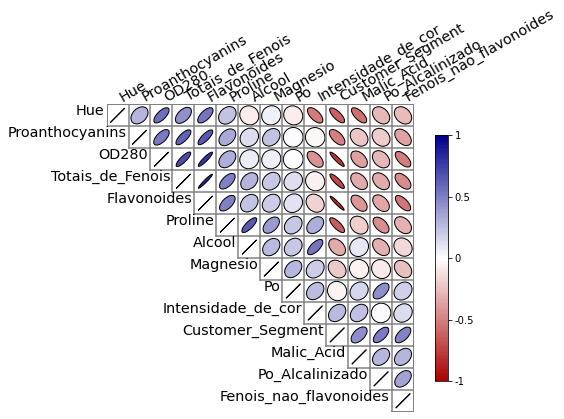

In [ ]:
from biokit.viz import corrplot

grafico_de_correlacao = corrplot.Corrplot(matriz_correlacao)
grafico_de_correlacao.plot(upper="ellipse", fontsize = "x-large")
# Para esse tipo de gráfico deve-se fazer esses dois comandos
# a fim de torná-lo legível, pois, se não, as letras ficam embaralhadas. 
fig = plt.gcf()
fig.set_size_inches(13,8)

fig.show()

In [ ]:
# Interpretando o gráfico:
# As elipses em azul significa que são diratamente
# proporcionais, quando um aumenta o outro também. 
# Por outro lado, as elipses em vermelho significa que 
# são inversamente proporcionais. De outra forma os 'riscos', 
# quase uma reta, simboliza valores altamente correlacionados. 

In [ ]:
# Acessando os atributos do dataframe
atributos = dados_df.columns

# Normalizando, ou seja, escalonando as features
for atributo in atributos:
    dados_df[atributo] = (dados_df[atributo]-min(dados_df[atributo]))/(max(dados_df[atributo])-min(dados_df[atributo]))

dados_df.describe()



,Alcool,Malic_Acid,Po,Po_Alcalinizado,Magnesio,Totais_de_Fenois,Flavonoides,Fenois_nao_flavonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Normalizando com o sklearn
from sklearn import preprocessing

# MinMaxScaler realiza a operação de normalizar os valores, 
# colocando-os entre -1 e 1, por exemplo. A normalização é importante, 
# pois para o machine learning valores com grandes variações não 
# são tão proficuos para a análise. 
min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(dados_df)

# Como após a transformação os valores são retornados em numpy arrays, 
# preciso transformar novamente em dataframe através dessa forma. 
# columns=dados_df.keys() significa que quero que minhas colunas sigam
# o mesmo paradigma dos dados_df. 
dados_df = pd.DataFrame(np_df, columns=dados_df.keys())
dados_df.describe()

,Alcool,Malic_Acid,Po,Po_Alcalinizado,Magnesio,Totais_de_Fenois,Flavonoides,Fenois_nao_flavonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.cluster import KMeans

SEED = 5
np.random.seed(SEED)

# O KMeans também apresenta uma aleatorização, o que significa
# que a cada vez que for executado, se não passarmos um SEED, 
# os grupos serão gerados de forma aleatória. Para findar essa 
# aleatoriedade basta passar o SEED, como está acima
agrupador = KMeans(n_clusters=3)
agrupador.fit(dados_df)

labels = agrupador.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
import plotly.graph_objects as go

# markers indica que queremos que os dados sejam apresentados como marcadores, 
# relacionados ao marker, que forma um dicionário com cada cor atrelada aos respectivos grupos. 
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_df['Intensidade_de_cor'], y = dados_df['Alcool'],
                                                        mode = 'markers',                      
                                                        marker = dict(color = agrupador.labels_.astype(np.float)),
                                                        text = labels))
fig.show()

In [ ]:
# Cada cor representa um grupo, que, para vê-lo, basta passar o mouse sobre o circulo. 
# O eixo x indica a intensidade da cor do vinho e o eixo y seu teor alcólico. 
# Esse gráfico está informando a coloração e teor alcólico do vinho que cada grupo, 
# isto é, que cada consumidor consome. 

In [ ]:
# go significa objeto gráfico. Toda vez que o instancia junto do Figure, 
# ele cria um novo gráfico. Caso um gráfico posterior tenha que apresentar dados
# do antecessor, recomenda-se que em sua geração não passe fig = go.Figure(), 
# começando já com o fig.add_trace...
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=dados_df['Intensidade_de_cor'], y = dados_df['Alcool'], z = dados_df["Proline"],
                                                        mode = 'markers',                      
                                                        marker = dict(color = agrupador.labels_.astype(np.float)),
                                                        text = labels))

fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))

fig.show()

In [ ]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = dados_df.keys()
print(centros)

     Alcool  Malic_Acid        Po  ...     OD280   Proline  Customer_Segment
0  0.322960    0.230939  0.469813  ...  0.555396  0.167494          0.500000
1  0.711096    0.250000  0.587166  ...  0.693590  0.595958          0.008333
2  0.558324    0.514721  0.574703  ...  0.153921  0.249323          0.989796

[3 rows x 14 columns]


In [ ]:
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'], y = centros['Alcool'], z = centros["Proline"],
                                                        mode = 'markers',                      
                                                        marker = dict(color = "red"),
                                                        text = [0,1,2]))

fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))

fig.show()

In [ ]:
# Só não entendo bem o que significa esses centros dos agrupadores. 
# Penso que pode ser o limiar que define o que é grupador 0, 1 ou 2, 
# ao menos em maior quantidade, proporção em uma determinada região. 

In [ ]:
# Outro agrupador
from sklearn.cluster import DBSCAN

SEED = 5
np.random.seed(SEED)

# eps significa a distancia maxima entre dois pontos para que sejam considerados próximos e 
# pertencentes ao mesmo grupo. 
# min_samples é a quantidade maxima de amostra para cada grupo
# metric é a métrica usada para definir como serão feitas as distâncias, 
# a maneira como os pontos serão separados
agrupadorDBSCAN = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')
agrupadorDBSCAN.fit(dados_df)

agrupadorDBSCAN.labels_
labelsDBSCAN = agrupadorDBSCAN.labels_

In [ ]:
# Os valores -1 indicam que são ruidos. 
# O DBSCAN nos informa que encontrou três grupos, sendo 0,1 e 2, respectivamente. 

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=dados_df['Intensidade_de_cor'], y = dados_df['Alcool'], z = dados_df["Proline"],
                                                        mode = 'markers',                      
                                                        marker = dict(color = agrupadorDBSCAN.labels_.astype(np.float)),
                                                        text = labels))

fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))

fig.show()

In [ ]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# Para obtermos a largura de banda estimada devemos passar como 
# parâmetro o dataframe dos dados que queremos agrupar, bem como o quantile, 
# que significa o valor de proporção ao começo, meio ou fim dos dados. 
# Por exemplo, com 0.1 temos um valor mais perto do inicio do que no meio ou fim. 
# Se aumentasse esse valor, distanciaria do inicio aproximando-se do meio ou fim. 
# Quanto maior for o valor do quantile menos clusters, grupos ele irá formar. 
bw = estimate_bandwidth(dados_df, quantile=0.2)

agrupadorMean = MeanShift(bandwidth=bw)
agrupadorMean.fit(dados_df)
agrupadorMean.labels_
# Esse agrupador só consegue achar dois grupos diferentes. 



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=dados_df['Intensidade_de_cor'], y = dados_df['Alcool'], z = dados_df["Proline"],
                                                        mode = 'markers',                      
                                                        marker = dict(color = agrupadorMean.labels_.astype(np.float)),
                                                        text = labels))

fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))

fig.show()


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

faixa_n_clusters = [i for i in range(2,10)]


from sklearn.cluster import KMeans
valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters=k)
    # Já adapta e prediz os valores retorando-os em labels
    labels = agrupador.fit_predict(dados_df)
    media_silhueta = silhouette_score(dados_df, labels)
    valores_silhueta.append(media_silhueta)

In [ ]:
fig =go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title = "Valores de Silhueta Médios",
    xaxis_title = "Número de Clústeres",
    yaxis_title = "Valor médio de silhueta",
    )